In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import numpy as np

In [3]:
import chardet

with open("takehome_users.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'encoding': 'ISO-8859-1', 'confidence': 0.7294372453287324, 'language': ''}

In [4]:
users = pd.read_csv("takehome_users.csv",encoding='ISO-8859-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
engagement = pd.read_csv("takehome_user_engagement.csv")
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
 engagement.shape

(207917, 3)

In [7]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
engagement["time_stamp"] = engagement["time_stamp"].astype('datetime64[ns]')
engagement["user_id"] = engagement["user_id"].astype('category')

In [9]:
engagement.set_index("time_stamp", inplace=True)

In [10]:
engagement.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [11]:
engagement["week"] = engagement.index.week.astype('category')
engagement.head()

<ipython-input-11-dc2a75af89ff>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  engagement["week"] = engagement.index.week.astype('category')


,user_id,visited,week
time_stamp,,,
2014-04-22 03:53:30,1,1,17
2013-11-15 03:45:04,2,1,46
2013-11-29 03:45:04,2,1,48
2013-12-09 03:45:04,2,1,50
2013-12-25 03:45:04,2,1,52


In [12]:
df = engagement.groupby(['week', 'user_id']).sum()
df

visited
week user_id         
1    1            NaN
     2            1.0
     3            NaN
     4            NaN
     5            NaN
...               ...
52   11996        NaN
     11997        NaN
     11998        NaN
     11999        NaN
     12000        NaN

[458796 rows x 1 columns]

In [41]:
df.dropna()

visited
week user_id         
1    2            1.0
     10           5.0
     42           4.0
     43           1.0
     46           1.0
...               ...
52   11961        1.0
     11964        2.0
     11969        3.0
     11974        1.0
     11975        3.0

[57172 rows x 1 columns]

In [13]:
df['adopted_user'] = df['visited']>3

In [14]:
df = df.dropna()

In [15]:
df

visited  adopted_user
week user_id                       
1    2            1.0         False
     10           5.0          True
     42           4.0          True
     43           1.0         False
     46           1.0         False
...               ...           ...
52   11961        1.0         False
     11964        2.0         False
     11969        3.0         False
     11974        1.0         False
     11975        3.0         False

[57172 rows x 2 columns]

In [26]:
adoptive_users = df[df['adopted_user']==True].index.get_level_values('user_id').unique()

In [111]:
df.index.get_level_values('user_id')

CategoricalIndex([    2,    10,    42,    43,    46,    63,    69,    81,
                     82,    87,
                  ...
                  11920, 11924, 11939, 11957, 11959, 11961, 11964, 11969,
                  11974, 11975],
                 categories=[1, 2, 3, 4, 5, 6, 7, 10, ...], ordered=False, name='user_id', dtype='category', length=57172)

In [36]:
users['adoptive_user'] = users['object_id'].isin(adoptive_users)

In [41]:
users['adoptive_user'].value_counts()

False    10832
True      1168
Name: adoptive_user, dtype: int64

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot:xlabel='adoptive_user', ylabel='Count'>

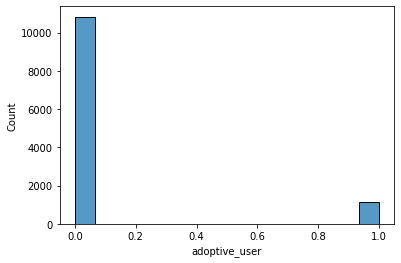

In [39]:
sns.histplot(users['adoptive_user'])

In [42]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adoptive_user               12000 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 949.3+ KB


In [43]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adoptive_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,False
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [84]:
categorical_variable = ['object_id','name','email','creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']
datetime_variable = ['creation_time','last_session_creation_time']

users[datetime_variable]=users[datetime_variable].astype('datetime64[ns]')
users[categorical_variable]=users[categorical_variable].astype('category')
users['invited_by_user_id'] = users['invited_by_user_id'].astype('float')


In [85]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  category      
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  category      
 3   email                       12000 non-null  category      
 4   creation_source             12000 non-null  category      
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  category      
 7   enabled_for_marketing_drip  12000 non-null  category      
 8   org_id                      12000 non-null  category      
 9   invited_by_user_id          12000 non-null  float64       
 10  adoptive_user               12000 non-null  bool          
dtypes: bool(1), category(7), datetime64[ns](2), float64(1)

<AxesSubplot:>

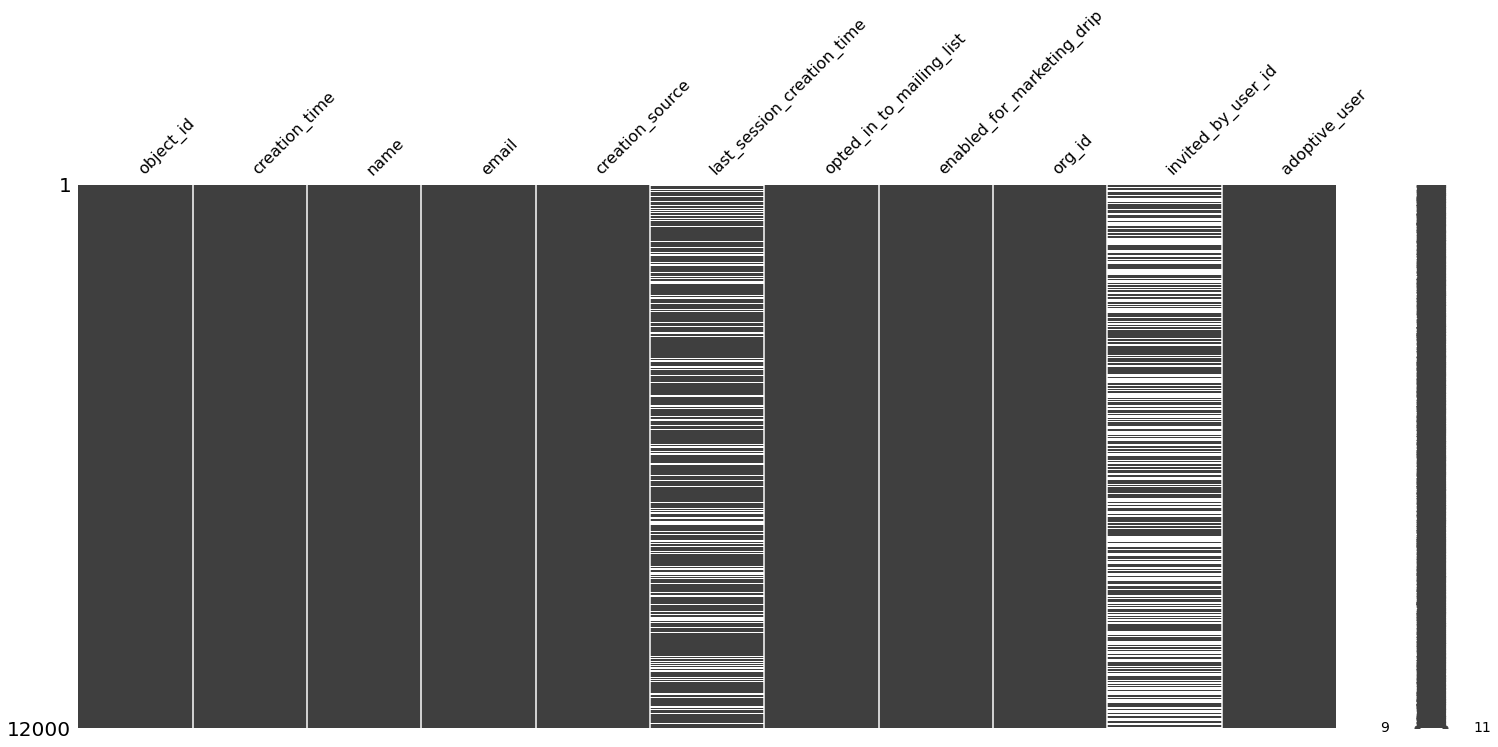

In [46]:
msno.matrix(users)

In [51]:
users['last_session_creation_time'].fillna(0)

0        1970-01-01 00:00:01.398138810
1        1970-01-01 00:00:01.396237504
2        1970-01-01 00:00:01.363734892
3        1970-01-01 00:00:01.369210168
4        1970-01-01 00:00:01.358849660
                     ...              
11995    1970-01-01 00:00:01.378448055
11996    1970-01-01 00:00:01.358274517
11997    1970-01-01 00:00:01.398602716
11998    1970-01-01 00:00:01.338638159
11999    1970-01-01 00:00:01.390726632
Name: last_session_creation_time, Length: 12000, dtype: object

In [63]:
users[['invited_by_user_id']] = users[['invited_by_user_id']].fillna(0)
users['invited_by_user_id'] =  users['invited_by_user_id'].astype('category')

<AxesSubplot:>

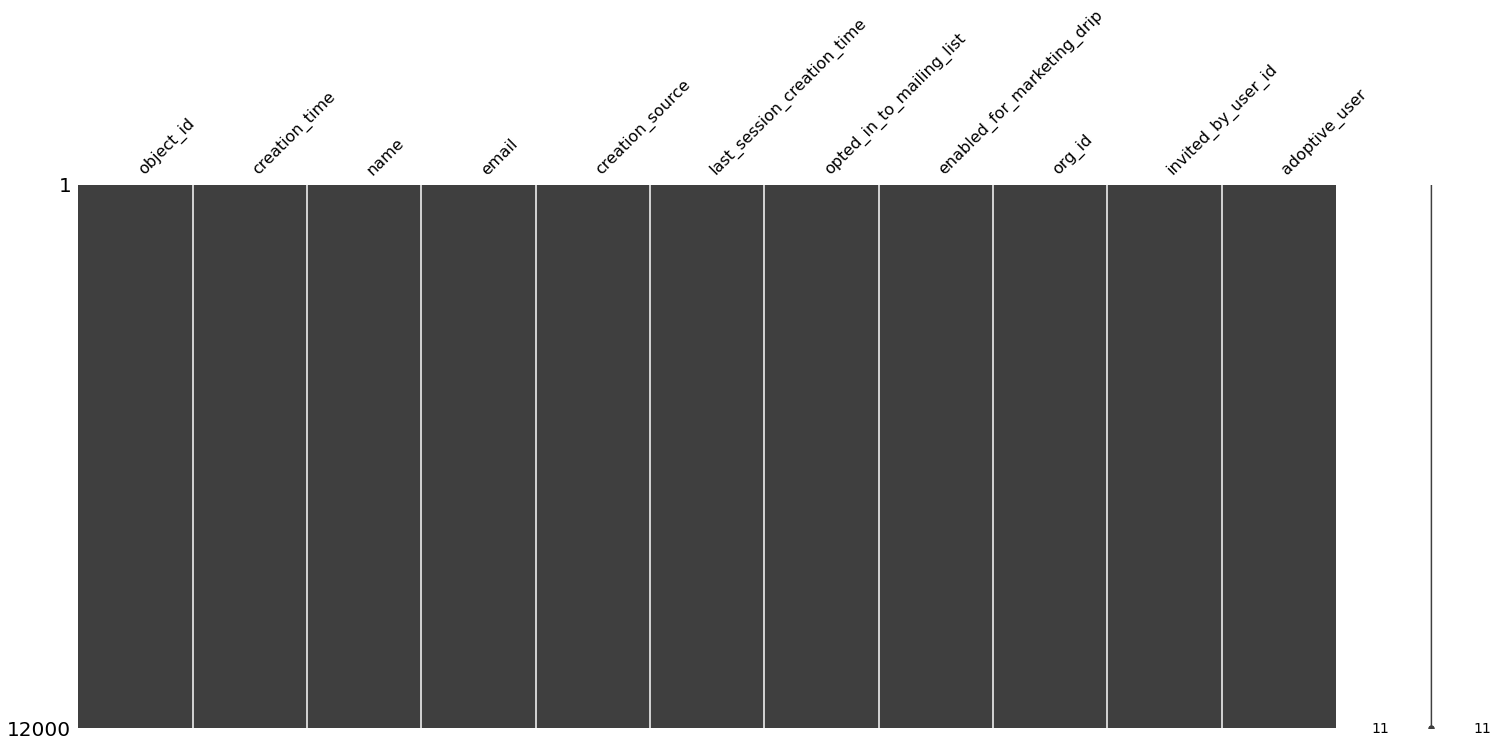

In [64]:
msno.matrix(users)

In [105]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  category      
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  category      
 3   email                       12000 non-null  category      
 4   creation_source             12000 non-null  category      
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  category      
 7   enabled_for_marketing_drip  12000 non-null  category      
 8   org_id                      12000 non-null  category      
 9   invited_by_user_id          12000 non-null  category      
 10  adoptive_user               12000 non-null  bool          
dtypes: bool(1), category(8), datetime64[ns](2)
memory usag

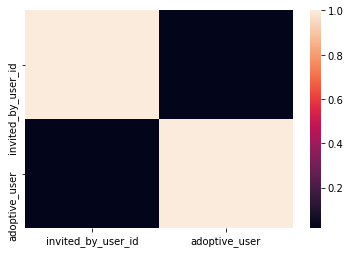

In [86]:
sns.heatmap(users.corr())
plt.show()

<AxesSubplot:>

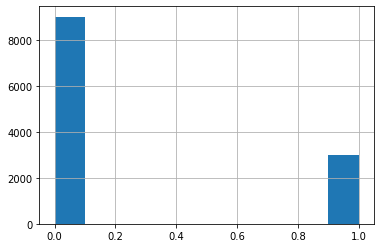

In [87]:
users['opted_in_to_mailing_list'].hist()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


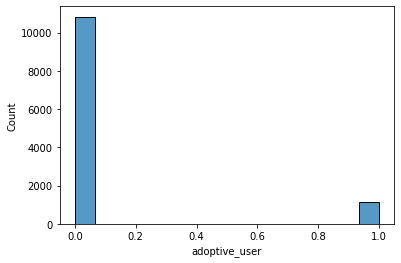

In [88]:
sns.histplot(users['adoptive_user'])
plt.show()

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import classification_report
import eli5
import time

In [91]:
X = users.drop("adoptive_user",axis=1)
y = users["adoptive_user"]

categorical_features = ['object_id','name','email','creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

In [93]:
from  sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

classifiers = [
    svm.SVC(),
    linear_model.LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    linear_model.LinearRegression(),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(cv=3),
    linear_model.SGDClassifier()]


for item in classifiers:
    print(item)
    clf = item
    
    start=time.time()
    model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf)])
    
    model.fit(X_train, y_train)
    
    y_pred=model.predict(X_test)

    print("model score: %.3f" % model.score(X_test, y_test))
    
    end = time.time()

    print("Over all time taken : ", end-start)
    print("\n")


SVC()
model score: 0.901
Over all time taken :  17.847020864486694


LogisticRegression(max_iter=500)
model score: 0.901
Over all time taken :  1.5000858306884766


RandomForestClassifier()
model score: 0.901
Over all time taken :  10.531602382659912


LinearRegression()
model score: -0.038
Over all time taken :  0.5750327110290527


RidgeClassifier()
model score: 0.901
Over all time taken :  0.49402832984924316


RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), cv=3)
model score: 0.901
Over all time taken :  0.8430483341217041


SGDClassifier()
model score: 0.901
Over all time taken :  0.45102572441101074




In [96]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('one_hot', OneHotEncoder())])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',   linear_model.LogisticRegression(max_iter=500))])
    
model = pipe.fit(X_train, y_train)

In [106]:
onehot_columns = list(pipe.named_steps['preprocessor'].named_transformers_['cat'].named_steps['one_hot'].get_feature_names(input_features=categorical_features))

In [110]:
feature_list = eli5.formatters.as_dataframe.explain_weights_df(pipe.named_steps['classifier'], feature_names=onehot_columns,top=50)

<function matplotlib.pyplot.show(close=None, block=None)>

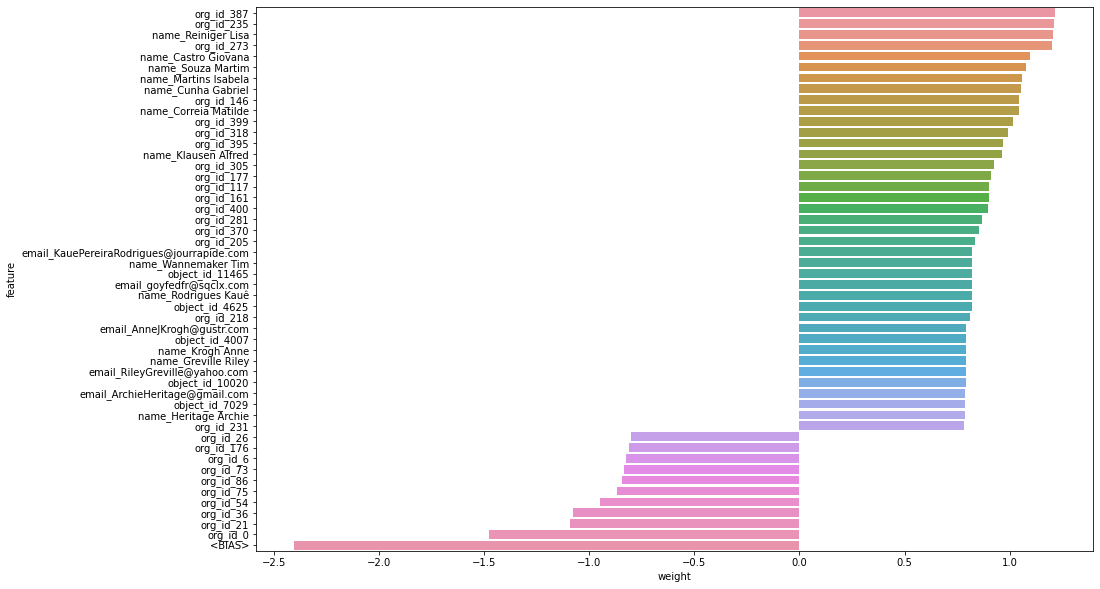

In [111]:
plt.figure(figsize=(15,10))
sns.barplot(x= "weight",y="feature",data=feature_list)
plt.show